This notebook shows some statistics and visualisations about the shootings dataset. Another Notebook is done for the modelling part

In [1]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# Function to standardize the data 
from sklearn.preprocessing import scale



import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

#### We used interactives graphs. So please rerun the code to see the plots in case they don't show

In [2]:
def figfunc(x_, y_, title_, x_title, y_title, height_, width_):
    fig = go.Figure(go.Bar(
        x=x_,y=y_,marker={'color': count_year['count'], 
        'colorscale': 'RdBu'},
    ))
    fig.update_layout(title_text=title_,xaxis_title=x_title,yaxis_title=y_title,height=height_,width=width_,title_x=0.5)
    fig.show()
    return
    


In [3]:
# Load the data
shootings = pd.read_csv("shootings.csv")
shootings.head()

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender      race           city state  signs_of_mental_illness threat_level  \
0      M     Asian        Shelton    WA                     True       attack   
1      M     White          Aloha    OR                    False       attack   
2      M  Hispanic        Wichita    KS                    False        other   
3      M     White  San Francisco    CA                     True       attack   
4      M  Hispanic          Evans    CO                    False       attack   

          flee  body_camera          arms_category  
0  Not fleeing        False                   Guns  
1  Not fleeing        False                   Guns  
2  Not fleeing        False                Unarmed  
3  Not fleeing        False  Other unusual objects  
4  Not fleeing        False       Piercing objects

In [4]:
#total number of cases
total = shootings.count()["id"]

In [5]:
#Adding Age groups
bins = [0,17,40,60,100]
group_names = ['Teenager','Adult','Old','Very Old']
shootings['Age Group'] = pd.cut(shootings['age'], bins, labels= group_names)
#converting date column from str to date
shootings['date']=pd.to_datetime(shootings['date'])
shootings['year'] = pd.DatetimeIndex(shootings['date']).year
shootings['month'] = pd.DatetimeIndex(shootings['date']).month
shootings['month_year']= pd.to_datetime(shootings['date']).dt.to_period('M')
shootings['weekdays']=shootings['date'].dt.strftime('%A') 

count_year= shootings.groupby(['year']).agg('count')['id'].to_frame(name='count').reset_index()

### Killings by Year

In [6]:
figfunc(x_=count_year['year'], y_=count_year['count'], title_="Killings by Year", x_title="Year", y_title="Number of Victims", height_=600, width_=600)

- The collect of data in 2020 stops in June that's why we can see a sudden drop after 2019. (no signification)
- We can see that the killings are getting less by each year.
- After the drop in counts from the year 2015 to 2016, the count of shot people is almost the same

### Killings by Month

AttributeError: Unknown property ticks

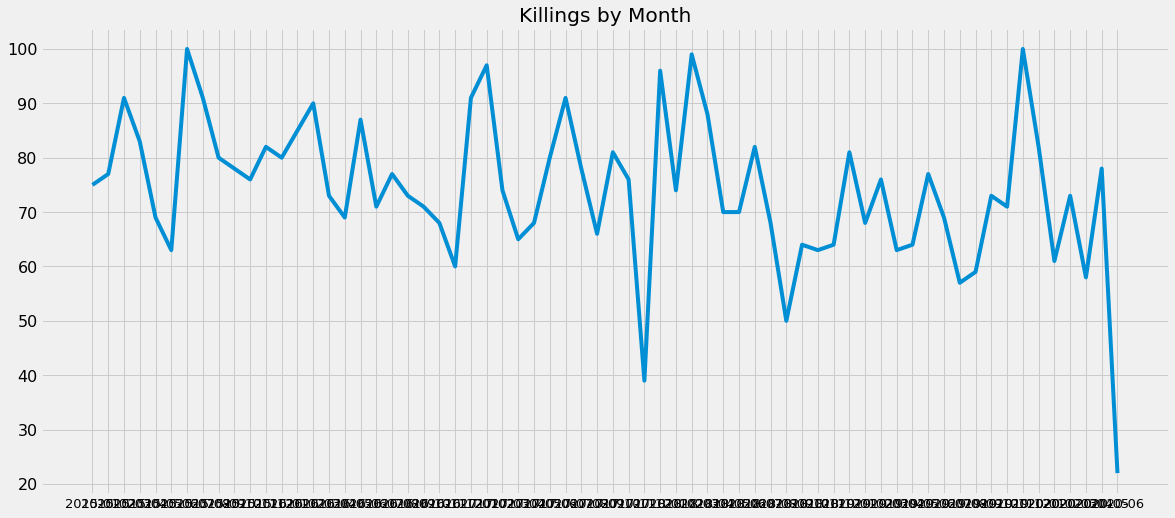

In [8]:
plt.style.use('fivethirtyeight')
shootings['month_year']= shootings.month_year.astype(str)
line_chart = shootings.groupby(['month_year']).agg('count')['id'].to_frame(name='count').reset_index()
plt.figure(figsize=(18,8))
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.plot(line_chart['month_year'],line_chart['count'])
plt.title('Killings by Month')
plt.xticks(ticks = line_chart['month_year'],rotation=90)
plt.show()

In [9]:
count_month= shootings.groupby(['month']).agg('count')['id'].to_frame(name='count').reset_index()
figfunc(x_=count_month['month'], y_=count_month['count'], title_="Killings per month", x_title="Month", y_title="Number of Victims", height_=800, width_=800)

- january, fibruary and march are the months with the hights number of killings.

### Weekdays Death Report

In [10]:
weekdays_killings = shootings['weekdays'].value_counts().reset_index().rename(columns={'index':'weekdays','weekdays':'count'})
weekdays_killings['weekdays'] = pd.Categorical(weekdays_killings['weekdays'],categories=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],ordered=True)
weekdays_killings = weekdays_killings.sort_values('weekdays')

In [11]:
fig = go.Figure(data=go.Scatter(x=weekdays_killings['weekdays'], y=weekdays_killings['count'], mode='markers', marker_size=10))

fig.update_layout(
    title_text = 'Weekdays Death Report',
    title_x=0.5,
    xaxis_title='Day of the Week',
    yaxis_title='Number of victimes'
)

- Most shootings occur in the middle of the week.
- Weekends proportion to weekdays are relatively smaller.

### Days with the most killing cases

In [12]:
shootings.date.value_counts()[:15]

2018-04-01    9
2018-01-06    9
2018-06-29    9
2015-12-14    8
2018-03-12    8
2019-01-28    8
2019-06-06    8
2017-02-10    8
2018-04-05    8
2015-07-07    8
2018-02-01    8
2019-12-10    8
2016-01-27    8
2017-01-24    8
2017-02-03    7
Name: date, dtype: int64

- Those days may present magnifisation or big crimes.

### Killings by Age Category

In [13]:
shot_or_taser = shootings.groupby(['Age Group','manner_of_death']).agg('count')['id'].to_frame(name='count').reset_index()
shot_or_taser = shot_or_taser.rename(columns = {'manner_of_death':'Manner of Death',})
shot_or_taser = shot_or_taser.sort_values(by=['count'],ascending=False)
shot_or_taser

Age Group   Manner of Death  count
2     Adult              shot   3041
4       Old              shot   1288
6  Very Old              shot    228
3     Adult  shot and Tasered    157
0  Teenager              shot     90
5       Old  shot and Tasered     76
7  Very Old  shot and Tasered      8
1  Teenager  shot and Tasered      7

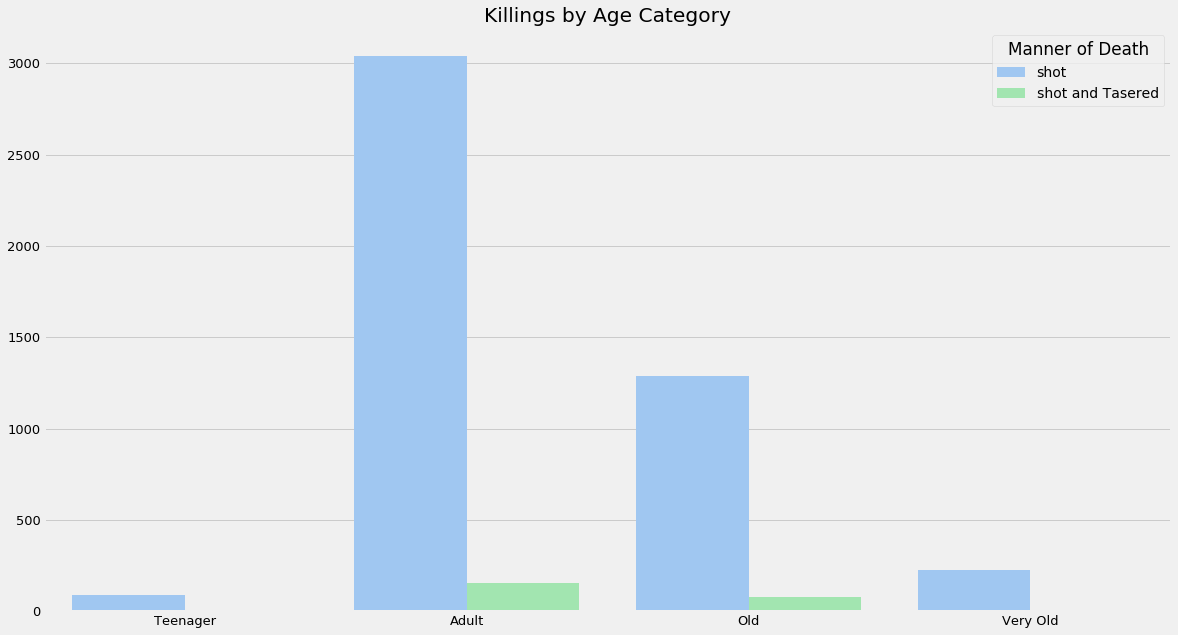

In [14]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(18,10))
sns.barplot(x="Age Group", y="count",hue="Manner of Death", data=shot_or_taser)
plt.xlabel("")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Killings by Age Category')
plt.ylabel("")
plt.show()


- Most people killed belong to Adult Category

### The youngest person killed

In [15]:
kids = shootings.loc[shootings['age']< 12,:]
print("the number of killed kids is ", kids.count()["id"])
age = shootings['age']
print('the youngest person who was killed is: ', age.min(), 'years old')

the number of killed kids is  2
the youngest person who was killed is:  6.0 years old


### The oldest person killed

In [16]:
print('the oldest person who was killed is: ', age.max(), 'years old')

the oldest person who was killed is:  91.0 years old


### Manner of death by year

In [17]:
shootings.groupby(['year','manner_of_death']).count()['id'].reset_index()

year   manner_of_death   id
0   2015              shot  898
1   2015  shot and Tasered   67
2   2016              shot  849
3   2016  shot and Tasered   55
4   2017              shot  857
5   2017  shot and Tasered   49
6   2018              shot  859
7   2018  shot and Tasered   29
8   2019              shot  827
9   2019  shot and Tasered   31
10  2020              shot  357
11  2020  shot and Tasered   17

- 'Shot' and 'shot and tasered' are getting less each year

In [18]:
manner = shootings.manner_of_death.value_counts()
shots = manner[0]
print("shots pourcentage : ", (shots/total)*100, "%" )

shots pourcentage :  94.93360572012257 %


### Frequency of different categories of weapons used

In [19]:
weapons=shootings['arms_category'].value_counts().reset_index().rename(columns={'index':'arms_category','arms_category':'count'})
figfunc(x_=weapons['arms_category'], y_=weapons['count'], title_="Frequency of different categories of weapons used", x_title="category of weapon used", y_title="Number of Victims", height_=600, width_=800)


In [20]:
weapons=shootings['armed'].value_counts().reset_index().rename(columns={'index':'weapon used','armed':'count'})
fig = go.Figure([go.Pie(labels=weapons['weapon used'],values=weapons['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')

fig.update_layout(title="Frequency of different weapons used", title_x=0.5)
fig.show()

- We can see that more than 56% of people  were armed with Gun, probably because of the lenient Arms laws in the U.S

### Killings by gender

In [21]:
killings_by_gender=shootings['gender'].value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
figfunc(x_=killings_by_gender['gender'], y_=killings_by_gender['count'], title_="Killings by gender", x_title="Gender", y_title="Number of Victims", height_=500, width_=500)

- we can see that Men's killings count is much larger than Women

### Signs of Mental illness

In [22]:
mental_illness=shootings['signs_of_mental_illness'].value_counts().reset_index().rename(columns={'index':'signs_of_mental_illness','signs_of_mental_illness':'count'})
fig = go.Figure([go.Pie(labels=mental_illness['signs_of_mental_illness'],values=mental_illness['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')

fig.update_layout(title="Signs of mental illness",title_x=0.5)
fig.show()

- It looks like most of the victims were mentally stable

### Killings by Race by Year

In [23]:
race_by_year = shootings.groupby(['year','race']).agg('count')['id'].to_frame(name='count').reset_index()
race_by_year = race_by_year.sort_values(by='count',ascending=False)

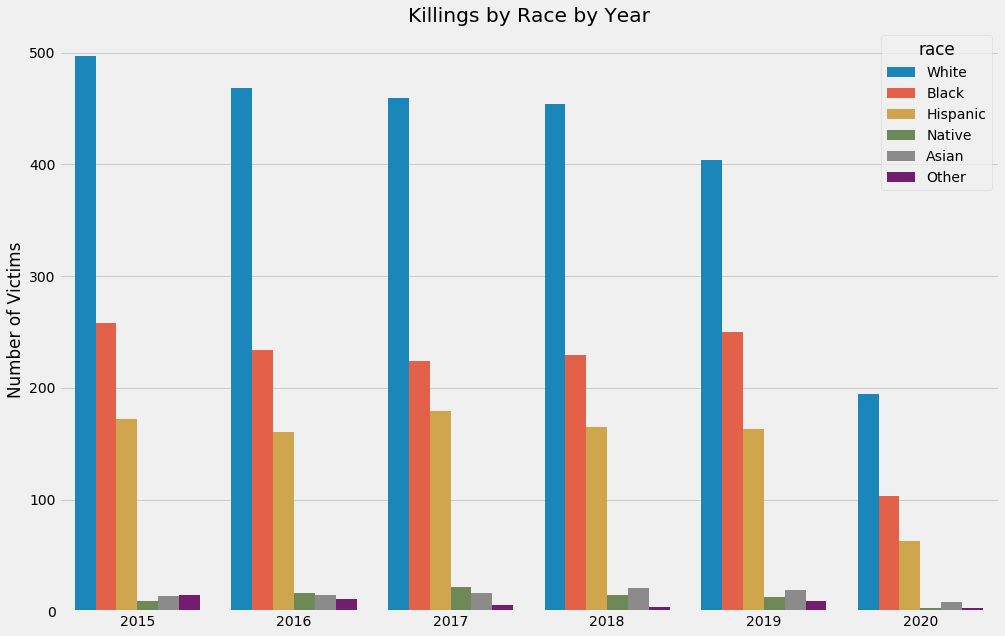

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
sns.barplot(x="year", y="count",hue="race", data=race_by_year)
plt.title('Killings by Race by Year')
plt.ylabel('Number of Victims')
plt.xlabel('')
plt.show()

- We can see that every year the count of killings in White Race is much larger than other races.
- For the White Race We can see that the killings are getting less by each year.
- For the Black and Hispanic Race the count of killings increases or decreases slightly each year.

### Killings by Race by Age

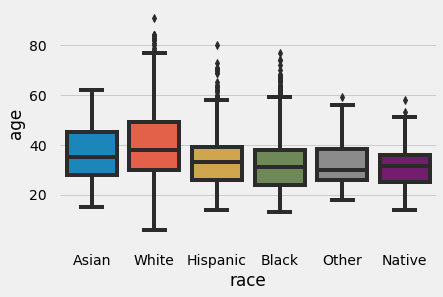

In [25]:
sns.boxplot(x="race", y="age",data=shootings)
sns.despine(offset=10, trim=True)

- The cases of age above 60 years are mostly from the White race.
- We can see that in the Asian,Native and Other race, the age is primarily between 20 and 60 years old. 

### Signs of mental illness vs Race 

In [26]:
data_crosstab = pd.crosstab(shootings['signs_of_mental_illness'], 
                            shootings['race'],  
                               margins = True ) 
print(data_crosstab)

race                     Asian  Black  Hispanic  Native  Other  White   All
signs_of_mental_illness                                                    
False                       69   1114       745      64     37   1763  3792
True                        24    184       157      14     11    713  1103
All                         93   1298       902      78     48   2476  4895


- Notice that % of white people with mental illness is 40.44 % contrariwise just 16.5% of black peapole had mental issues. 
- 17% of Hispanic are supposed to be like that
- Is there a racist prejudice when it comes to expectation of violence?

### Killings by state

In [27]:
killings_by_state=shootings['state'].value_counts().reset_index().rename(columns={'index':'state','state':'count'})
figfunc(x_=killings_by_state['state'], y_=killings_by_state['count'], title_="Killings by state", x_title="State", y_title="Number of Victims", height_=500, width_=1000)


- We can see that 30% of the cases are from California, Texas and Florida

### Killings per year per State

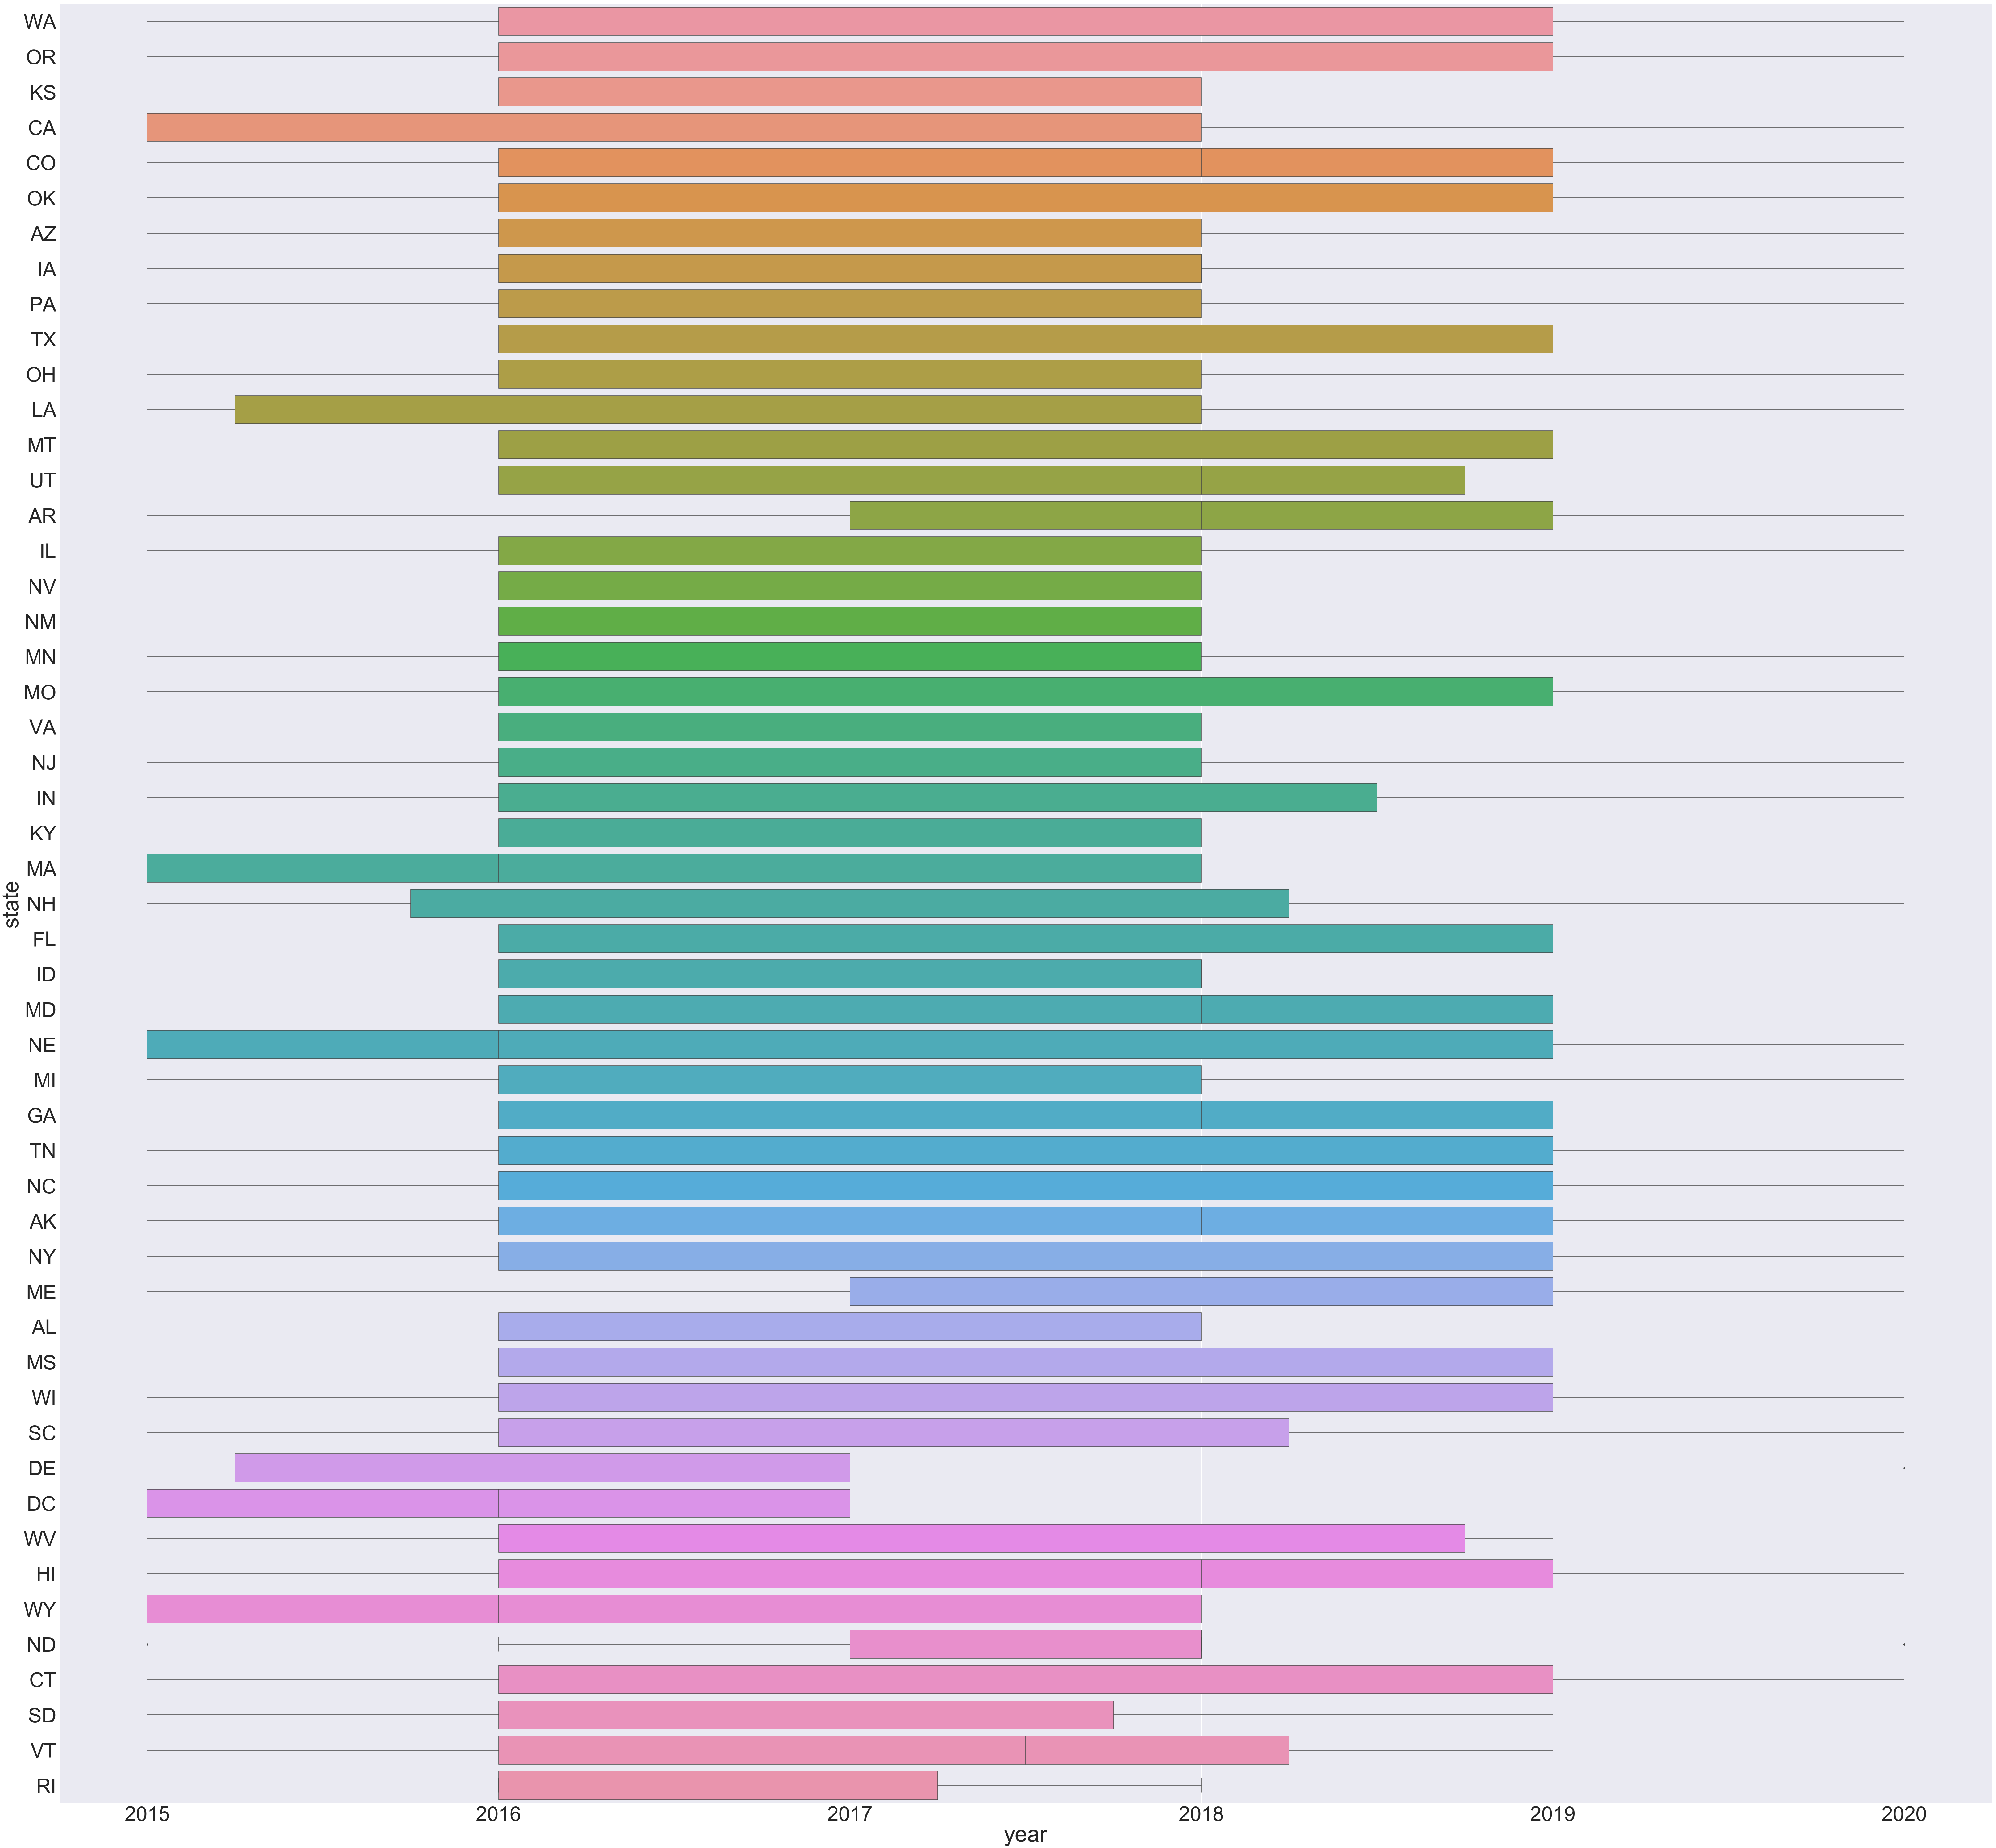

In [28]:
sns.set(font_scale=6,rc={'figure.figsize':(100,100)})
ax = sns.boxplot(x="year", y="state", data=shootings)

- It seems that the number of shootings decreased in some states but got worse in others starting from 2016

### Killings by States with different Flee Status

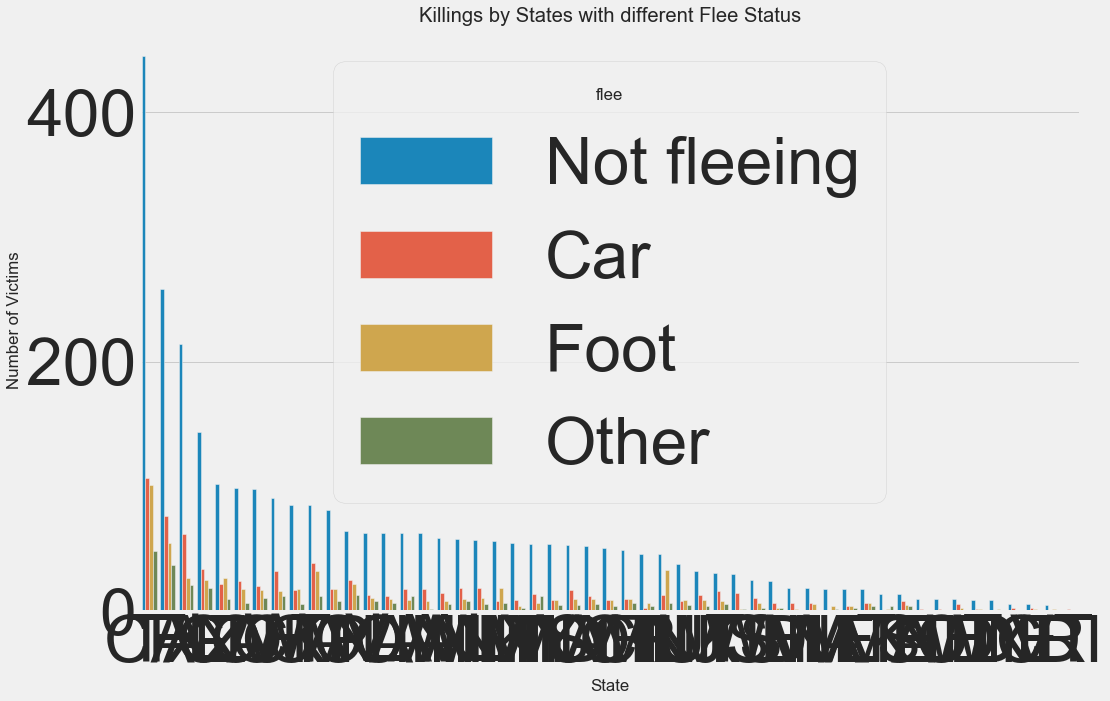

In [29]:
states_flee = shootings.groupby(['state','flee']).agg('count')['id'].to_frame(name='count').reset_index().sort_values('count',ascending=False)
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,10))
sns.barplot(x='state', y='count',hue='flee', data=states_flee)
plt.ylabel('Number of Victims')
plt.title('Killings by States with different Flee Status')
plt.xlabel("State")
plt.show()

### Flee

In [30]:
flee=shootings['flee'].value_counts().reset_index().rename(columns={'index':'flee','flee':'count'})
flee

flee  count
0  Not fleeing   3073
1          Car    820
2         Foot    642
3        Other    360

In [31]:
fig = go.Figure(data=[go.Pie(labels=flee['flee'], values=flee['count'], hole=.1,textinfo='label+percent',
                             insidetextorientation='radial')])
fig.update_layout(title_text='Victim Flee?', title_x=0.5)
fig.show()

- 62.8% of the victimes were not fleeing during the encounter and yet they were killed.
- This is completely an unexpected scenario.

##### Flee vs Gender

In [32]:
# flee vs gender (2 categorical variables => Contingency table)
data_crosstab = pd.crosstab(shootings['flee'], 
                            shootings['gender'],  
                               margins = True ) 
print(data_crosstab)


gender         F     M   All
flee                        
Car           48   772   820
Foot           7   635   642
Not fleeing  156  2917  3073
Other         11   349   360
All          222  4673  4895


- 70% of female didn't flee.
- 62% of male didn't flee. 

### Top 10 cities where most shooting occurred

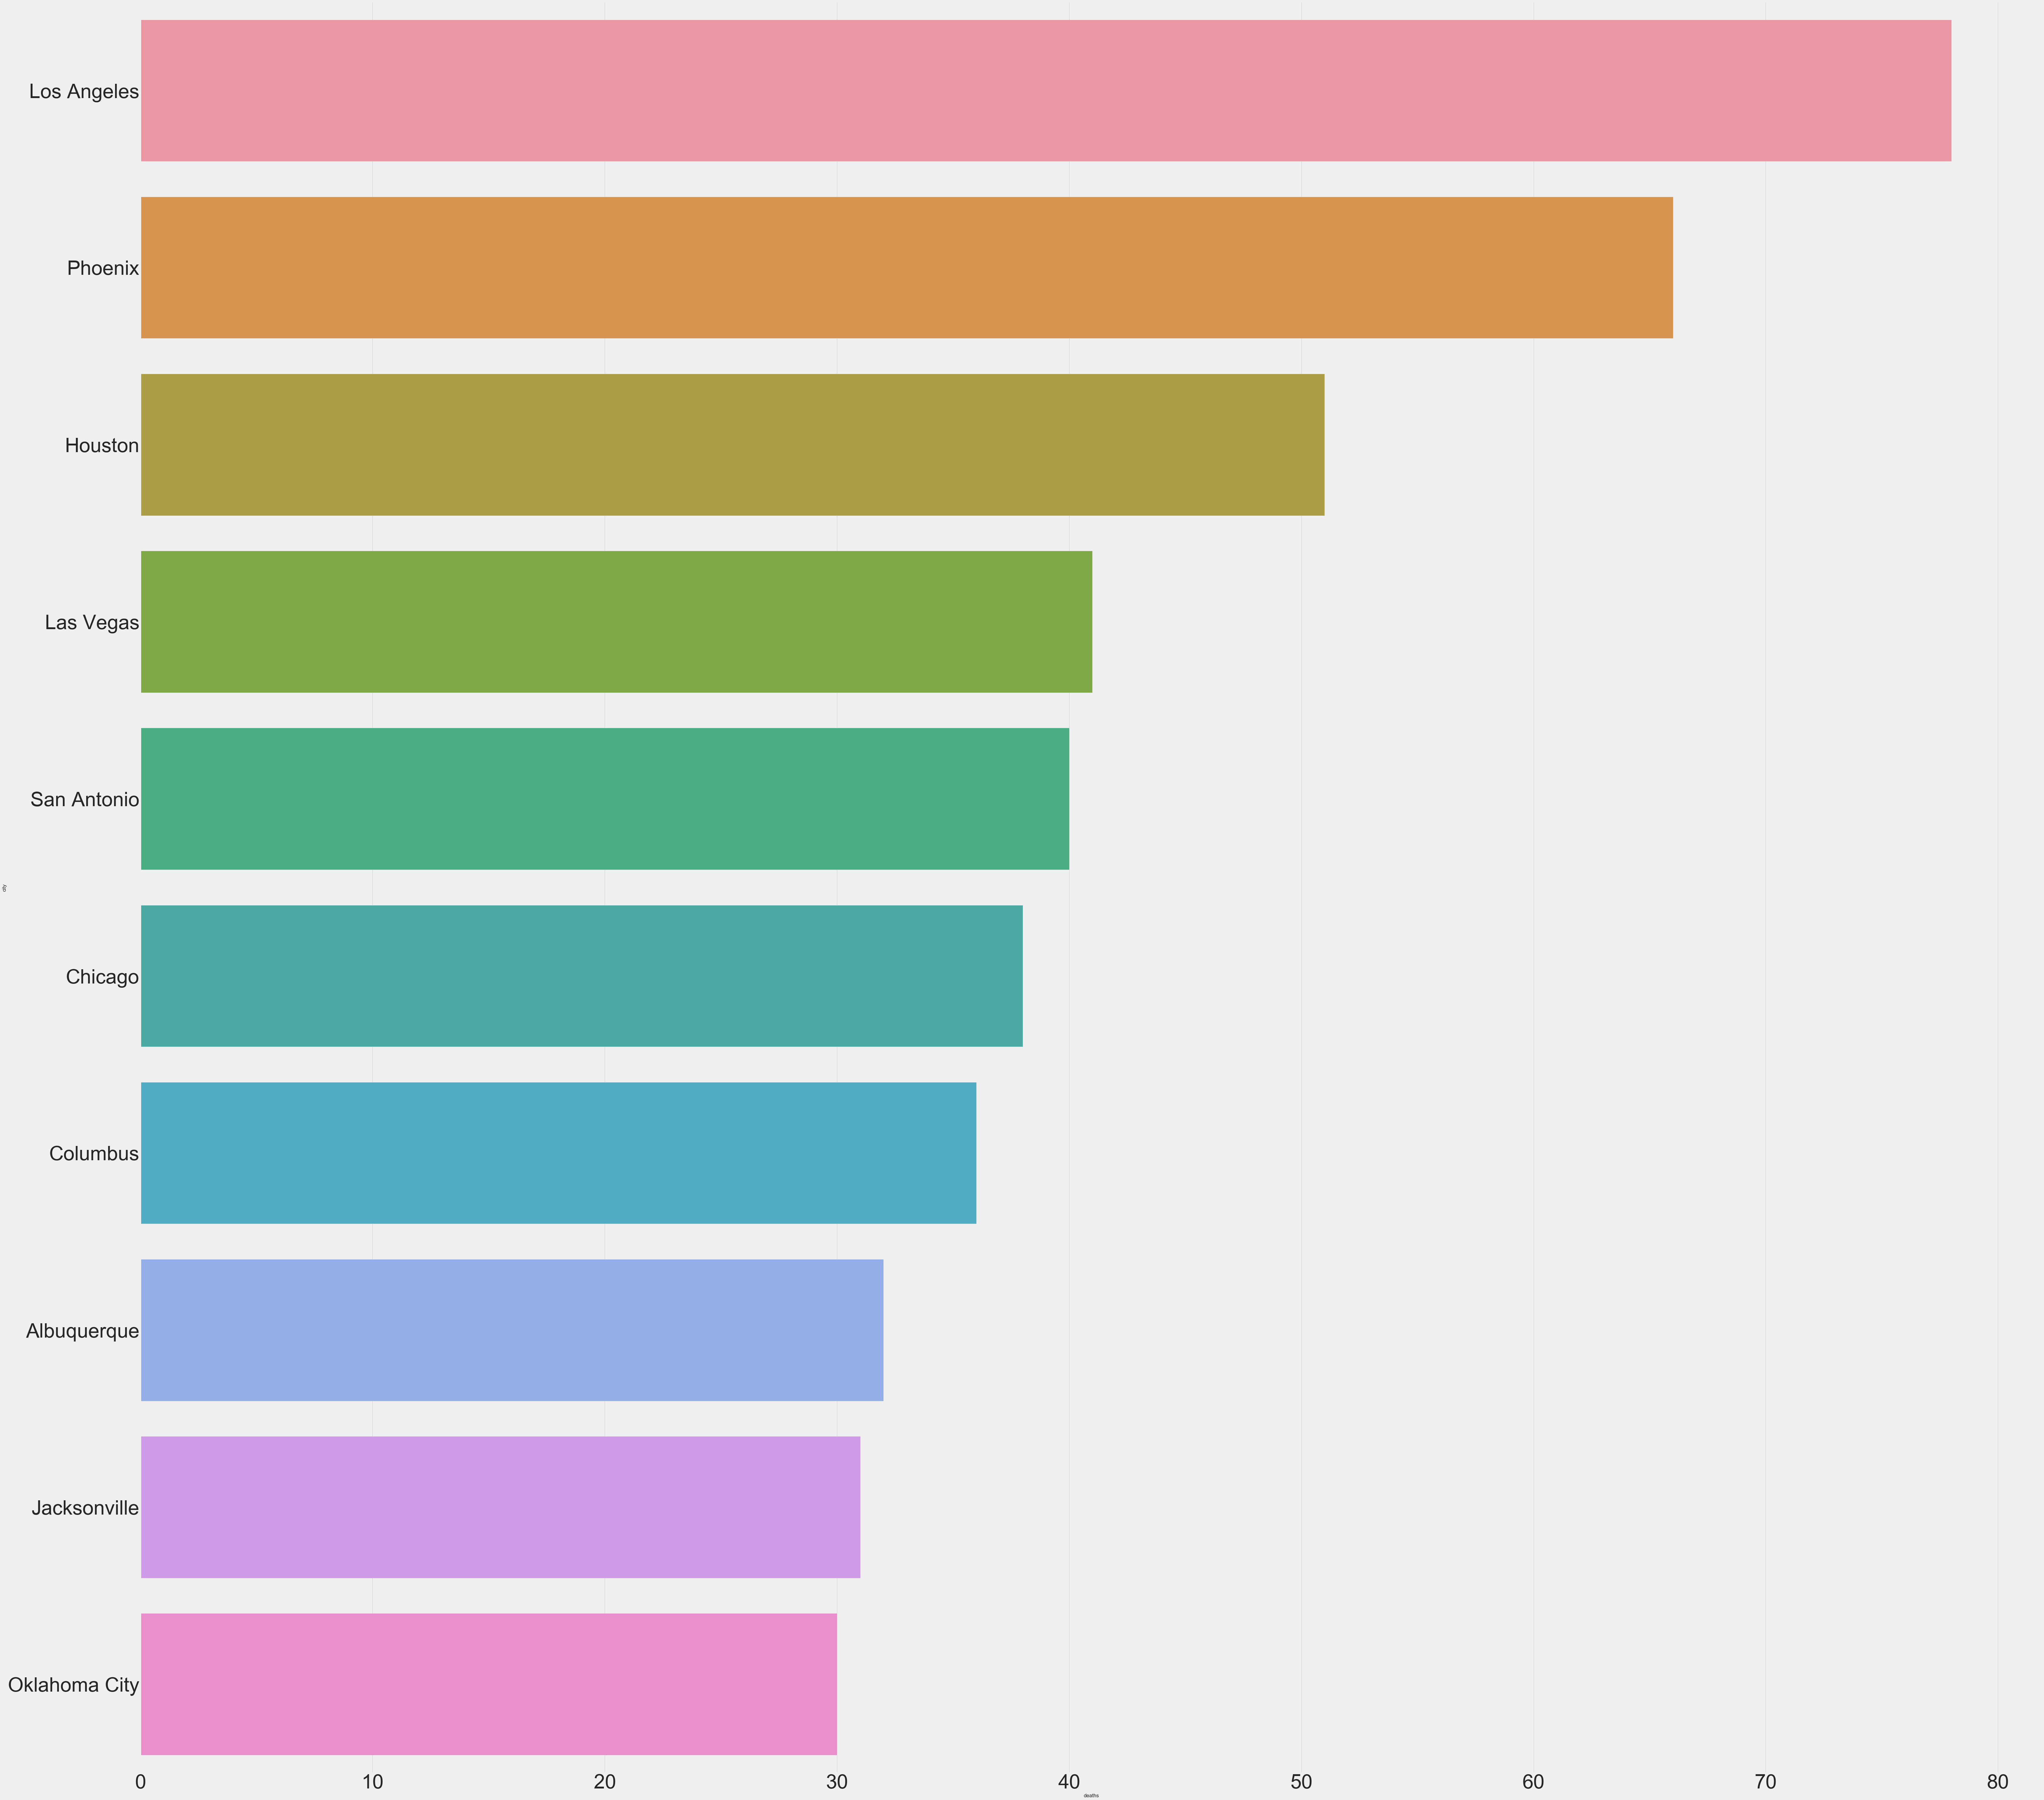

In [33]:
killings_by_city=shootings['city'].value_counts().reset_index().rename(columns={'index':'city','city':'deaths'}).head(10)

sns.barplot(y="city", x="deaths", data=killings_by_city,
            label="deaths")